> # <span style="font-family: JetBrains Mono; color:SteelBlue">IMPORT</span>

In [79]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
#from pypfopt.efficient_frontier import EfficientFrontier
#from pypfopt import risk_models
#from pypfopt import expected_returns
#from pypfopt.discrete_allocation import DiscreteAllocation
#from pypfopt.discrete_allocation import get_latest_prices
plt.style.use('fivethirtyeight')

> # <span style="font-family: JetBrains Mono; color:SteelBlue">IDO (2010 januar elsejetol napjainkig)</span>

In [80]:
start = dt.datetime(2010,1,1)
end = dt.datetime.now()

> # <span style="font-family: JetBrains Mono; color: SteelBlue">RESZVENYEK</span>

In [81]:
#Pfizer - PFE (Egeszsegugy)
#Oracle - ORCL (Informatika)
#NextEra Energy - NEE (Megujulo energia)
#Financial Select Sector SPDR Fund - XLF (Penzugy)
#Honeywell International Inc - HON (Ipar)

assets = ['PFE', 'ORCL', 'NEE', 'XLF', 'HON']

dataframe = pd.DataFrame()

for stock in assets:
    dataframe[stock] = web.DataReader(stock, data_source='yahoo', start=start, end=end)['Close']

> # <span style="font-family: JetBrains Mono; color: SteelBlue">VIZUALIZALAS</span>

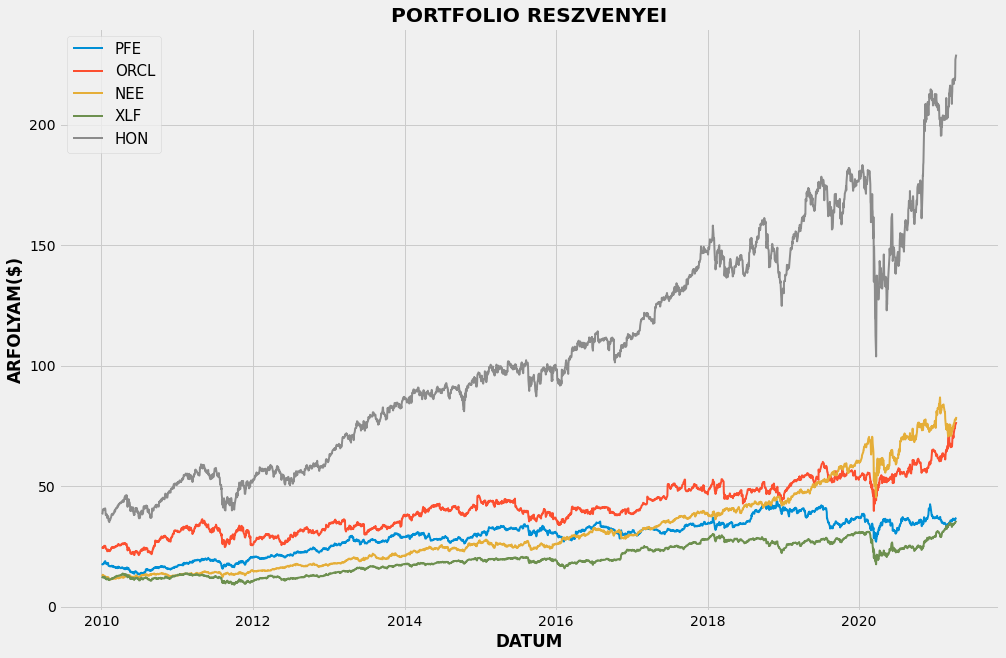

In [82]:
plt.figure(figsize=(15,10))

for t in dataframe.columns.values:
    plt.plot(dataframe[t], label = t, lw=2)
    plt.title('PORTFOLIO RESZVENYEI', fontweight='bold')

plt.xlabel('DATUM', fontweight='bold')
plt.ylabel('ARFOLYAM($)', fontweight='bold')
plt.legend(fontsize=15)
plt.show()

> # <span style="font-family: JetBrains Mono; color: SteelBlue">SZORAS</span>

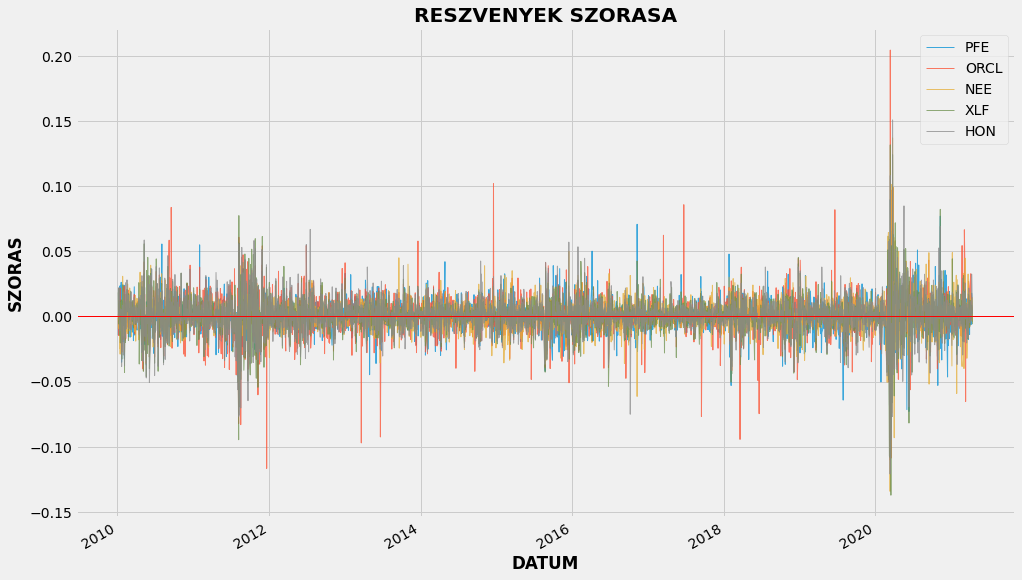

In [83]:
returns = dataframe.pct_change()
returns.plot(figsize=(15,10), lw=1, alpha = 0.75)
plt.title('RESZVENYEK SZORASA', fontweight='bold')
plt.xlabel('DATUM', fontweight='bold')
plt.ylabel('SZORAS', fontweight='bold')
plt.axhline(0, color="red", lw=1)
plt.show()

> # <span style="font-family: JetBrains Mono; color: SteelBlue">KOVARIANCIA MATRIX</span>

In [84]:
# ~250 hetkoznap van egy evben
kov_matrix = returns.cov() * 250
print(kov_matrix)
print('-------------------------------------------------------')
print('PFE - ORCL: {:.2f}'.format(np.sqrt(kov_matrix.iloc[0,1])*100) + '%')
print('------------------')
print('PFE - NEE: {:.2f}'.format(np.sqrt(kov_matrix.iloc[0,2])*100) + '%')
print('------------------')
print('PFE - XLF: {:.2f}'.format(np.sqrt(kov_matrix.iloc[0,3])*100) + '%')
print('------------------')
print('PFE - HON: {:.2f}'.format(np.sqrt(kov_matrix.iloc[0,4])*100) + '%')
print('------------------')
print('ORCL - NEE: {:.2f}'.format(np.sqrt(kov_matrix.iloc[1,2])*100) + '%')
print('------------------')
print('ORCL - XLF: {:.2f}'.format(np.sqrt(kov_matrix.iloc[1,3])*100) + '%')
print('------------------')
print('ORCL - HON: {:.2f}'.format(np.sqrt(kov_matrix.iloc[1,4])*100) + '%')
print('------------------')
print('NEE - XLF: {:.2f}'.format(np.sqrt(kov_matrix.iloc[2,3])*100) + '%')
print('------------------')
print('NEE - HON: {:.2f}'.format(np.sqrt(kov_matrix.iloc[2,4])*100) + '%')
print('------------------')
print('XLF - HON: {:.2f}'.format(np.sqrt(kov_matrix.iloc[3,4])*100) + '%')

           PFE      ORCL       NEE       XLF       HON
PFE   0.041736  0.023314  0.015963  0.025967  0.024065
ORCL  0.023314  0.064146  0.018616  0.035746  0.033370
NEE   0.015963  0.018616  0.040479  0.021093  0.021542
XLF   0.025967  0.035746  0.021093  0.053522  0.043032
HON   0.024065  0.033370  0.021542  0.043032  0.055580
-------------------------------------------------------
PFE - ORCL: 15.27%
------------------
PFE - NEE: 12.63%
------------------
PFE - XLF: 16.11%
------------------
PFE - HON: 15.51%
------------------
ORCL - NEE: 13.64%
------------------
ORCL - XLF: 18.91%
------------------
ORCL - HON: 18.27%
------------------
NEE - XLF: 14.52%
------------------
NEE - HON: 14.68%
------------------
XLF - HON: 20.74%


> # <span style="font-family: JetBrains Mono; color: SteelBlue">KORRELACIOS MATRIX, R<sup>2</sup></span>

In [85]:
korr_matrix = returns.corr()
korr_matrix
r_negyzet = korr_matrix.iloc[:]**2
print('Korrelacios matrix:')
print(korr_matrix)
print('------------------------------------------------------')
print('R-negyzet:')
print(r_negyzet)

Korrelacios matrix:
           PFE      ORCL       NEE       XLF       HON
PFE   1.000000  0.450588  0.388371  0.549412  0.499667
ORCL  0.450588  1.000000  0.365340  0.610062  0.558880
NEE   0.388371  0.365340  1.000000  0.453171  0.454158
XLF   0.549412  0.610062  0.453171  1.000000  0.788985
HON   0.499667  0.558880  0.454158  0.788985  1.000000
------------------------------------------------------
R-negyzet:
           PFE      ORCL       NEE       XLF       HON
PFE   1.000000  0.203030  0.150832  0.301854  0.249667
ORCL  0.203030  1.000000  0.133473  0.372176  0.312347
NEE   0.150832  0.133473  1.000000  0.205364  0.206259
XLF   0.301854  0.372176  0.205364  1.000000  0.622497
HON   0.249667  0.312347  0.206259  0.622497  1.000000


> # <span style="font-family: JetBrains Mono; color: SteelBlue">HA CSAK...</span>

In [86]:
#Pfizer-be:
pfe_ret = np.sum(returns.loc[:, 'PFE'].mean()*250)*100
pfe_vol = np.sqrt(kov_matrix.iloc[0,0])*100
print('A PFE hozama: {:.2f}'.format(pfe_ret)+'%')
print('A PFE szorasa: {:.2f}'.format(pfe_vol)+'%')

print('-----------------------')

#Oracle-be:
orcl_ret = np.sum(returns.loc[:, 'ORCL'].mean()*250)*100
orcl_vol = np.sqrt(kov_matrix.iloc[1,1])*100
print('Az ORCL hozama: {:.2f}'.format(orcl_ret)+'%')
print('Az ORCL szorasa: {:.2f}'.format(orcl_vol)+'%')

print('-----------------------')

#NextEra Energy-be:
nee_ret = np.sum(returns.loc[:, 'NEE'].mean()*250)*100
nee_vol = np.sqrt(kov_matrix.iloc[2,2])*100
print('A NEE hozama: {:.2f}'.format(nee_ret)+'%')
print('A NEE szorasa: {:.2f}'.format(nee_vol)+'%')

print('-----------------------')

#Financial Select Sector SPDR Fund-ba:
xlf_ret = np.sum(returns.loc[:, 'XLF'].mean()*250)*100
xlf_vol = np.sqrt(kov_matrix.iloc[3,3])*100
print('Az XLF hozama: {:.2f}'.format(xlf_ret)+'%')
print('Az XLF szorasa: {:.2f}'.format(xlf_vol)+'%')

print('-----------------------')

#Honeywell International-ba:
hon_ret = np.sum(returns.loc[:, 'HON'].mean()*250)*100
hon_vol = np.sqrt(kov_matrix.iloc[4,4])*100
print('A HON hozama: {:.2f}'.format(hon_ret)+'%')
print('A HON szorasa: {:.2f}'.format(hon_vol)+'%')

A PFE hozama: 8.46%
A PFE szorasa: 20.43%
-----------------------
Az ORCL hozama: 13.13%
Az ORCL szorasa: 25.33%
-----------------------
A NEE hozama: 17.70%
A NEE szorasa: 20.12%
-----------------------
Az XLF hozama: 12.19%
Az XLF szorasa: 23.13%
-----------------------
A HON hozama: 18.50%
A HON szorasa: 23.58%


> # <span style="font-family: JetBrains Mono; color: SteelBlue">PORTFOLIO HOZAM, SZORAS, SHARPE-MUTATO</span>

In [87]:
weights = np.array([0.1, 0.2, 0.3, 0.1, 0.3]) #Sulyok

port_variance = np.dot(weights.T, np.dot(kov_matrix, weights))
port_volatility = np.sqrt(port_variance)

port_return = np.sum(returns.mean() * weights) * 250

risk_free = 0.01 # 1%
inflacio = 0.03 # 3%
#real hozam: (1+hozam)/(1+inflacio)-1
real_hozam = ((1 + port_return)/(1 + inflacio)) - 1

sharpe = ((port_return - risk_free) / port_volatility)

print('A portfolio eves hozama: {:.2f}'.format(port_return*100)+ '%')
print('A portfolio real hozama: {:.2f}'.format(real_hozam*100)+'%')
print('A portfolio szorasa: {:.2f}'.format(port_volatility*100)+ '%')
print('Sharpe-mutato: {:.2f}'.format(sharpe))
print('10 ev alatt(inflacioval): {:.2f}'.format((real_hozam*100)*10) +'%')

A portfolio eves hozama: 15.55%
A portfolio real hozama: 12.19%
A portfolio szorasa: 17.72%
Sharpe-mutato: 0.82
10 ev alatt(inflacioval): 121.87%


> # <span style="font-family: JetBrains Mono; color: SteelBlue">MONTE CARLO-MODSZER(Arakra)</span>

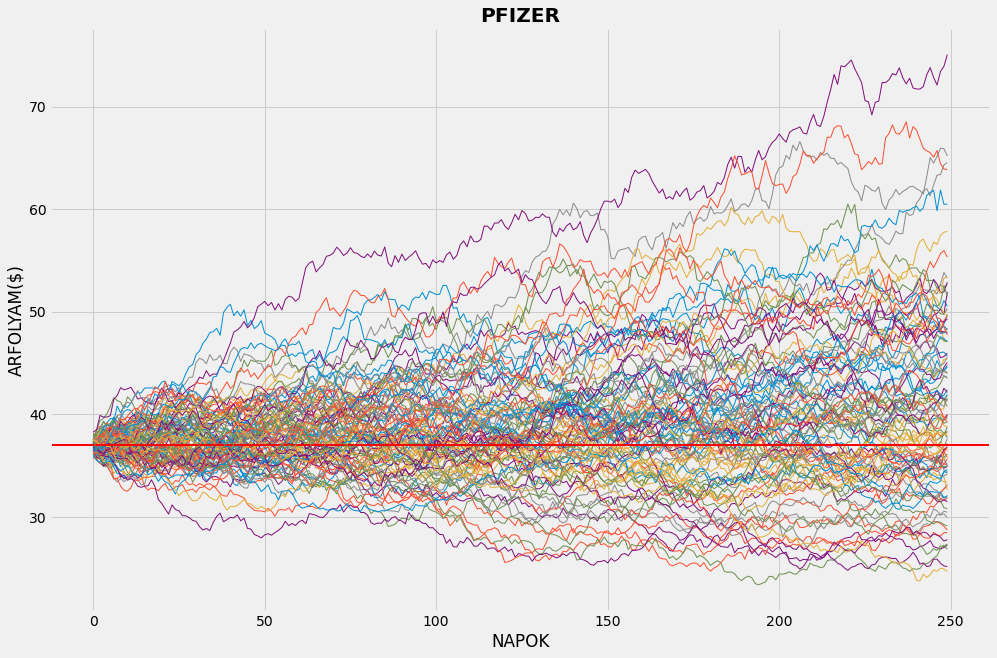

In [89]:
#Pfizer:
n = 100
days = 250 #1 ev

pfe_mu = returns['PFE'].mean()
pfe_sigma = returns['PFE'].std()

pfe_last_price = dataframe['PFE'].iloc[-1]
pfe_sim_returns = np.random.normal(pfe_mu, pfe_sigma, days)
pfe_sim_prices = pfe_last_price * (pfe_sim_returns + 1).cumprod()
plt.figure(figsize=(15,10))
plt.xlabel('NAPOK')
plt.ylabel('ARFOLYAM($)')
plt.title("PFIZER", fontweight='bold')

for i in range(n):
    pfe_sim_returns = np.random.normal(pfe_mu, pfe_sigma, days)
    pfe_sim_prices = pfe_last_price * (pfe_sim_returns + 1).cumprod()
    plt.axhline(pfe_last_price, color="red", lw=2)
    plt.plot(pfe_sim_prices, lw=1)
    
plt.show()

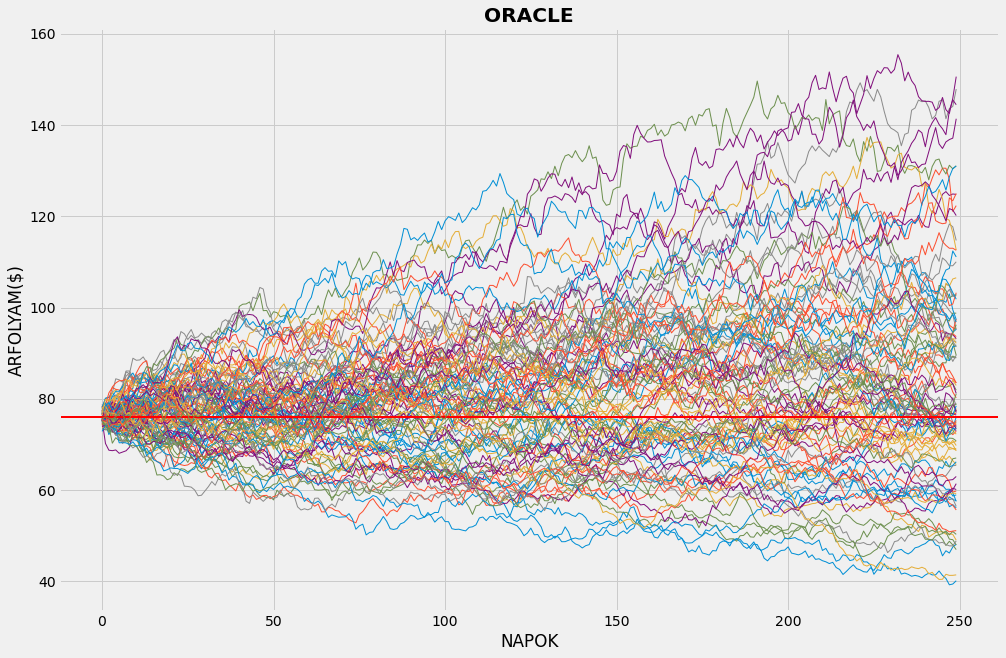

In [17]:
#Oracle:
n = 100
days = 250 #1 ev

orcl_mu = returns['ORCL'].mean()
orcl_sigma = returns['ORCL'].std()

orcl_last_price = dataframe['ORCL'].iloc[-1]
orcl_sim_returns = np.random.normal(orcl_mu, orcl_sigma, days)
orcl_sim_prices = orcl_last_price * (orcl_sim_returns + 1).cumprod()

plt.figure(figsize=(15,10))
plt.xlabel('NAPOK')
plt.ylabel('ARFOLYAM($)')
plt.title("ORACLE", fontweight='bold')

for i in range(n):
    orcl_sim_returns = np.random.normal(orcl_mu, orcl_sigma, days)
    orcl_sim_prices = orcl_last_price * (orcl_sim_returns + 1).cumprod()
    plt.axhline(orcl_last_price, color="red", lw=2)
    plt.plot(orcl_sim_prices, lw=1)
    
plt.show()

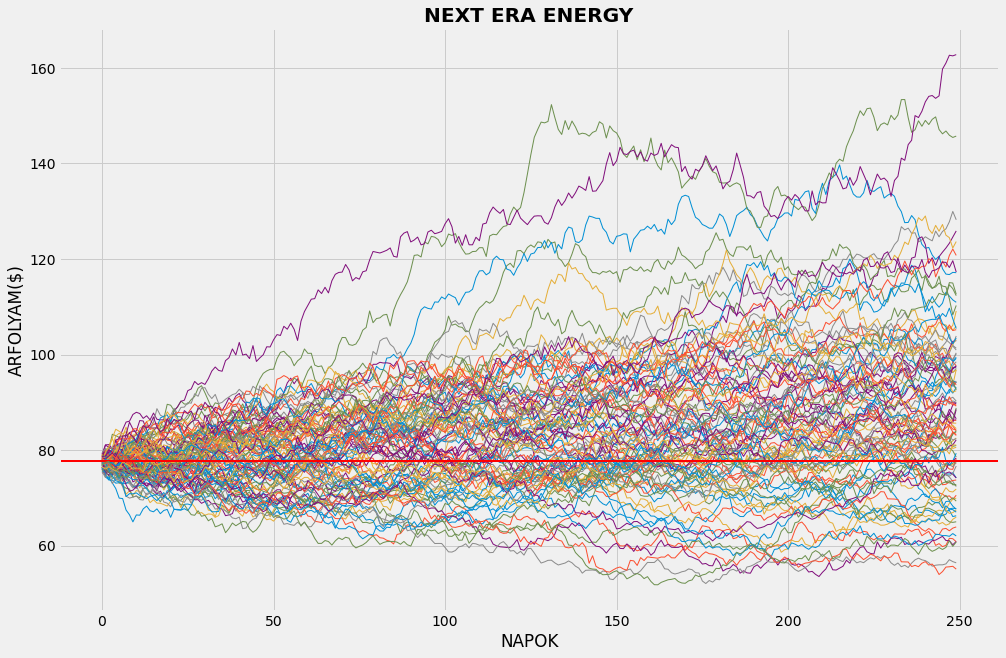

In [18]:
#Next Era Energy
n = 100
days = 250 #1 ev

nee_mu = returns['NEE'].mean()
nee_sigma = returns['NEE'].std()

nee_last_price = dataframe['NEE'].iloc[-1]

plt.figure(figsize=(15,10))
plt.xlabel('NAPOK')
plt.ylabel('ARFOLYAM($)')
plt.title("NEXT ERA ENERGY", fontweight='bold')

for i in range(n):
    nee_sim_returns = np.random.normal(nee_mu, nee_sigma, days)
    nee_sim_prices = nee_last_price * (nee_sim_returns + 1).cumprod()
    plt.axhline(nee_last_price, color="red", lw=2)
    plt.plot(nee_sim_prices, lw=1)
    
plt.show()

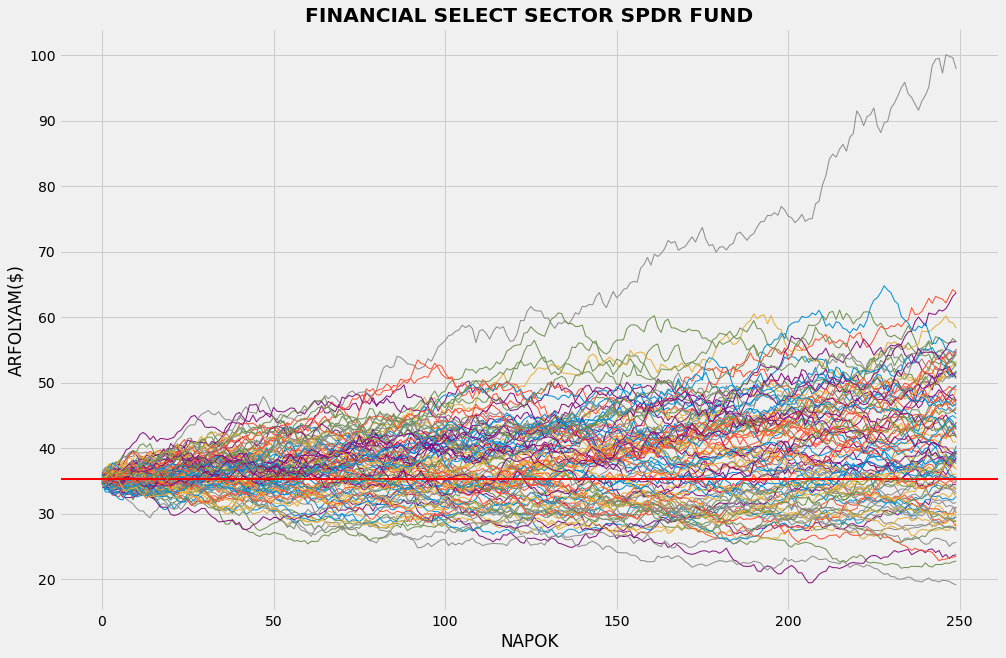

In [19]:
#Financial Select Sector SPDR Fund:
n = 100
days = 250 #1 ev

xlf_mu = returns['XLF'].mean()
xlf_sigma = returns['XLF'].std()

xlf_last_price = dataframe['XLF'].iloc[-1]

plt.figure(figsize=(15,10))
plt.xlabel('NAPOK')
plt.ylabel('ARFOLYAM($)')
plt.title("FINANCIAL SELECT SECTOR SPDR FUND", fontweight='bold')

for i in range(n):
    xlf_sim_returns = np.random.normal(xlf_mu, xlf_sigma, days)
    xlf_sim_prices = xlf_last_price * (xlf_sim_returns + 1).cumprod()
    plt.axhline(xlf_last_price, color="red", lw=2)
    plt.plot(xlf_sim_prices, lw=1)
    
plt.show()

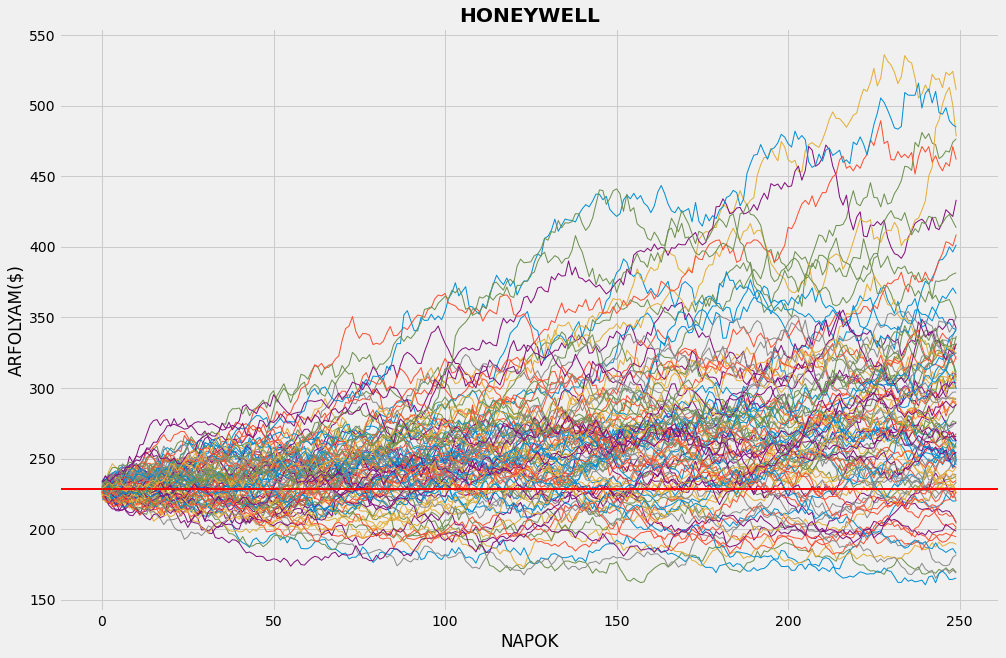

In [20]:
#Honeywell:
n = 100
days = 250 #1 ev

hon_mu = returns['HON'].mean()
hon_sigma = returns['HON'].std()

hon_last_price = dataframe['HON'].iloc[-1]

plt.figure(figsize=(15,10))
plt.xlabel('NAPOK')
plt.ylabel('ARFOLYAM($)')
plt.title("HONEYWELL", fontweight='bold')

for i in range(n):
    hon_sim_returns = np.random.normal(hon_mu, hon_sigma, days)
    hon_sim_prices = hon_last_price * (hon_sim_returns + 1).cumprod()
    plt.axhline(hon_last_price, color="red", lw=2)
    plt.plot(hon_sim_prices, lw=1)
    
plt.show()

> # <span style="font-family: JetBrains Mono; color: SteelBlue">1 DOLLAR MA HANY DOLLAR</span>

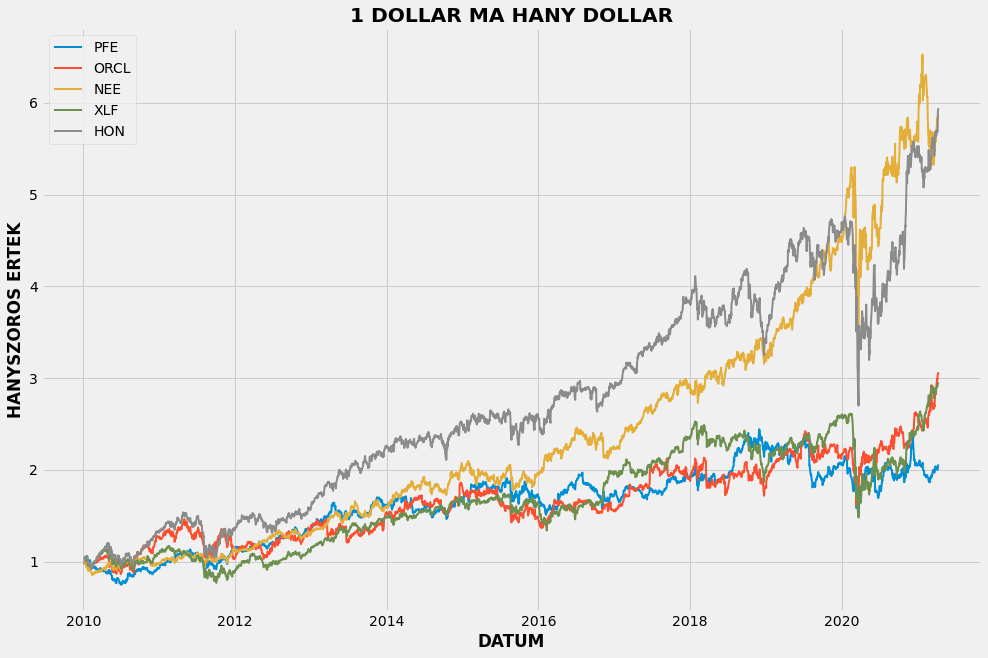

PFE: 2.06
ORCL: 3.06
NEE: 5.83
XLF: 2.96
HON: 5.94


In [60]:
plt.figure(figsize=(15,10))
cum_returns = (1 + returns).cumprod()

plt.plot(cum_returns, lw=2)
plt.legend(returns.columns)

plt.xlabel('DATUM', fontweight='bold')
plt.ylabel('HANYSZOROS ERTEK', fontweight='bold')
plt.title('1 DOLLAR MA HANY DOLLAR', fontweight='bold')
plt.show()

print('PFE: {:.2f}'.format(cum_returns.tail(1).iloc[0,0]))
print('ORCL: {:.2f}'.format(cum_returns.tail(1).iloc[0,1]))
print('NEE: {:.2f}'.format(cum_returns.tail(1).iloc[0,2]))
print('XLF: {:.2f}'.format(cum_returns.tail(1).iloc[0,3]))
print('HON: {:.2f}'.format(cum_returns.tail(1).iloc[0,4]))
